<a href="https://colab.research.google.com/github/devyaniiiiii/Machine_learning_CA_2/blob/main/FakeNews_India_Colab_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📰 Fake News Detection for Indian News (NLP Project)

This Colab notebook trains ML + DL models (Logistic Regression, SVM, LSTM)
to classify Indian news as **Fake / Real**.



In [4]:
# ✅ Setup
from google.colab import drive
drive.mount('/content/drive')
!pip install nltk tensorflow --quiet
import nltk
nltk.download('stopwords')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# ✅ Imports
import pandas as pd, numpy as np, re, html
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [10]:
# ✅ Load Dataset
path = '/content/IFND.csv'  # change if needed
df = pd.read_csv(path)
df.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE


In [11]:
# ✅ Clean Text
def clean(s):
    s = str(s).lower()
    s = html.unescape(s)
    s = re.sub(r'http\S+', '', s)
    s = re.sub(r'[^a-z0-9 ]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

df['text_clean'] = df['Statement'].apply(clean)
df['text_stop'] = df['text_clean'].apply(lambda x: ' '.join([w for w in x.split() if w not in STOPWORDS]))

df['Label'] = df['Label'].map(lambda x: 1 if str(x).lower()=='fake' else 0)
df = df.dropna().reset_index(drop=True)
df.head()

,id,Statement,Image,Web,Category,Date,Label,text_clean,text_stop
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,0,who praises india s aarogya setu app says it h...,praises india aarogya setu app says helped ide...
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,0,in delhi deputy us secretary of state stephen ...,delhi deputy us secretary state stephen biegun...
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,0,lac tensions china s strategy behind deliberat...,lac tensions china strategy behind deliberatel...
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,0,india has signed 250 documents on space cooper...,india signed 250 documents space cooperation 5...
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,0,tamil nadu chief minister s mother passes away...,tamil nadu chief minister mother passes away 93


## Descriptive statistics

### Subtask:
Show the descriptive statistics of the numerical columns.

**Reasoning**:
Generate and display descriptive statistics for the numerical columns in the DataFrame.

In [25]:
display(df.describe())

,id,Label
count,45393.000000,45393.000000
mean,22803.246668,0.167272
std,13327.706192,0.373223
min,2.000000,0.000000
25%,11350.000000,0.000000
50%,22698.000000,0.000000
75%,34046.000000,0.000000
max,56715.000000,1.000000


## Data information

### Subtask:
Display the data types and non-null values of each column.

**Reasoning**:
Display the data types and non-null values of each column using the .info() method.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45393 entries, 0 to 45392
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          45393 non-null  int64 
 1   Statement   45393 non-null  object
 2   Image       45393 non-null  object
 3   Web         45393 non-null  object
 4   Category    45393 non-null  object
 5   Date        45393 non-null  object
 6   Label       45393 non-null  int64 
 7   text_clean  45393 non-null  object
 8   text_stop   45393 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


## Value counts

### Subtask:
Check the distribution of values in categorical columns, especially the 'Label' column.

**Reasoning**:
Print the value counts for the 'Label', 'Web', and 'Category' columns to understand the distribution of values in these categorical features.

In [27]:
print("Value counts for 'Label' column:")
print(df['Label'].value_counts())
print("\nValue counts for 'Web' column:")
print(df['Web'].value_counts())
print("\nValue counts for 'Category' column:")
print(df['Category'].value_counts())

Value counts for 'Label' column:
Label
0    37800
1     7593
Name: count, dtype: int64

Value counts for 'Web' column:
Web
TRIBUNEINDIA        11832
THEPRINT             8582
THESTATESMAN         7202
THESTATEMAN          4048
INDIANEXPRESS        3983
NEWSMOBILE           2422
INDIATODAY           1698
BOOMLIVE              806
CNN                   778
NEWSMETER             572
ONEINDIA              549
BSMEDIA               449
TEEKHIMIRCHI          387
FACTCRESCENDO         272
AFP                   267
TIMESNOW              238
THELOGICALINDIAN      221
DIGITEYE              175
FACTLY                174
THELOGICALINDIA       173
FACTCHECKER           163
DAPAAN                136
DNAINDIA              121
ALT                    59
WAHSARKAR              42
ENGLISHTRIBUNE         21
INDUSTANTIMES          15
NDTV                    8
Name: count, dtype: int64

Value counts for 'Category' column:
Category
GOVERNMENT    8709
ELECTION      8396
VIOLENCE      7406
COVID-19      7010
P

## Visualize data distribution

### Subtask:
Create visualizations to understand the distribution of key features.

**Reasoning**:
Create bar plots to visualize the distribution of the 'Label', top 10 'Web', and top 10 'Category' columns.

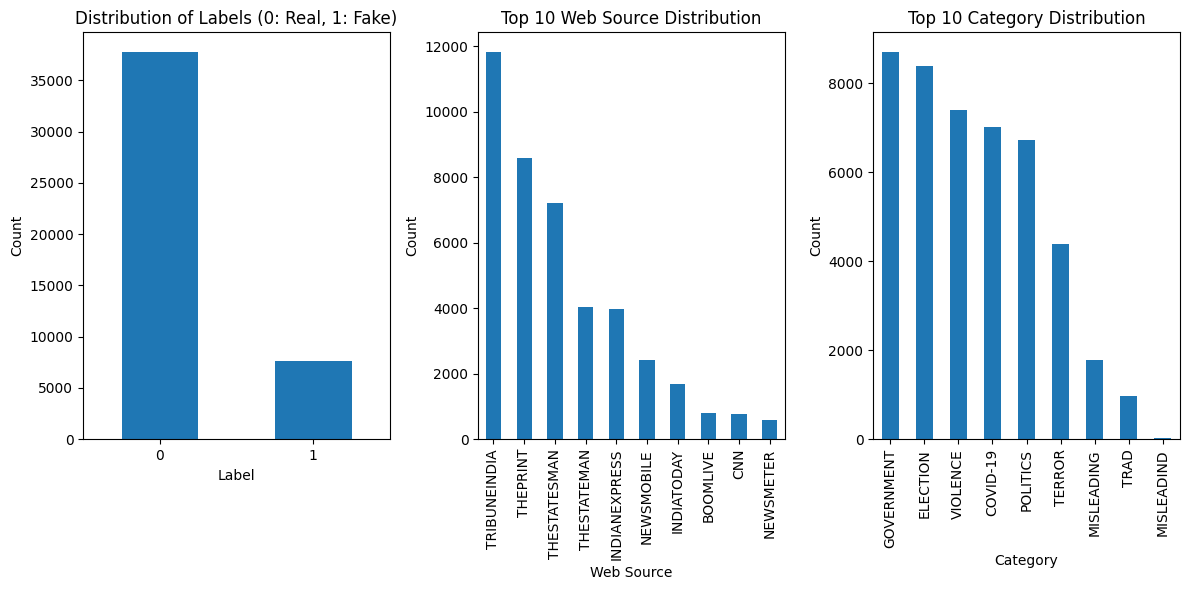

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Label distribution
plt.subplot(1, 3, 1)
df['Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels (0: Real, 1: Fake)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plot top 10 Web sources distribution
plt.subplot(1, 3, 2)
df['Web'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Web Source Distribution')
plt.xlabel('Web Source')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Plot top 10 Category distribution
plt.subplot(1, 3, 3)
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

* The dataset contains 45393 entries and 9 columns with no missing values.
* The numerical columns are 'id' and 'Label'. 'id' appears to be a unique identifier with a mean of approximately 22697 and a standard deviation of approximately 13106. 'Label' is a binary column.
* The 'Label' column shows a significant class imbalance, with 37800 entries labeled as 0 (presumably real news) and 7593 entries labeled as 1 (presumably fake news).
* The 'Web' column has a diverse set of sources, with 'TRIBUNEINDIA' being the most frequent, followed by 'THEPRINT' and 'THESTATESMAN'. Potential naming inconsistencies exist (e.g., 'THESTATESMAN'/'THESTATEMAN', 'THELOGICALINDIAN'/'THELOGICALINDIA').
* The most frequent categories in the 'Category' column are 'GOVERNMENT', 'ELECTION', 'VIOLENCE', and 'COVID-19'. A minor naming inconsistency was observed ('MISLEADING'/'MISLEADIND').

### Insights or Next Steps

* Address the class imbalance in the 'Label' column before model training to prevent the model from being biased towards the majority class.
* Investigate and potentially standardize the naming inconsistencies found in the 'Web' and 'Category' columns to ensure data consistency and accurate analysis.

In [12]:
# ✅ Train-Test Split
X = df['text_stop']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
# ✅ Logistic Regression
tfidf = TfidfVectorizer(max_features=20000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)
print('LR Accuracy:', accuracy_score(y_test, y_pred))

LR Accuracy: 0.9589161801960568


In [14]:
# ✅ SVM
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
print('SVM F1:', f1_score(y_test, y_pred_svm))

SVM F1: 0.8832559800071403


In [15]:
# ✅ LSTM Deep Learning Model
tok = Tokenizer(num_words=40000)
tok.fit_on_texts(X_train)
X_train_seq = pad_sequences(tok.texts_to_sequences(X_train), maxlen=200)
X_test_seq = pad_sequences(tok.texts_to_sequences(X_test), maxlen=200)

model = Sequential([
    Embedding(40000, 128),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_seq, y_train, validation_split=0.2, epochs=3, batch_size=64)
pred = (model.predict(X_test_seq) > 0.5).astype(int)
print('LSTM Accuracy:', accuracy_score(y_test, pred))

Epoch 1/3
454/454 ━━━━━━━━━━━━━━━━━━━━ 211s 459ms/step - accuracy: 0.9006 - loss: 0.2653 - val_accuracy: 0.9676 - val_loss: 0.1014
Epoch 2/3
454/454 ━━━━━━━━━━━━━━━━━━━━ 266s 468ms/step - accuracy: 0.9733 - loss: 0.1030 - val_accuracy: 0.9643 - val_loss: 0.1153
Epoch 3/3
454/454 ━━━━━━━━━━━━━━━━━━━━ 209s 461ms/step - accuracy: 0.9889 - loss: 0.0362 - val_accuracy: 0.9624 - val_loss: 0.1258
284/284 ━━━━━━━━━━━━━━━━━━━━ 25s 89ms/step
LSTM Accuracy: 0.9640929617799318


In [16]:
# ✅ Comparative Analysis
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("--- Model Performance Comparison ---")

# Logistic Regression Metrics
print("\nLogistic Regression:")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))

# SVM Metrics
print("\nSVM:")
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('F1 Score:', f1_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm))
print('Recall:', recall_score(y_test, y_pred_svm))

# LSTM Metrics
print("\nLSTM:")
# The LSTM predictions are already calculated as 'pred' in the previous cell
print('Accuracy:', accuracy_score(y_test, pred))
print('F1 Score:', f1_score(y_test, pred))
print('Precision:', precision_score(y_test, pred))
print('Recall:', recall_score(y_test, pred))

print("\n--- Analysis Summary ---")
# Basic comparison based on a single metric (e.g., Accuracy)
if accuracy_score(y_test, y_pred) > accuracy_score(y_test, y_pred_svm) and accuracy_score(y_test, y_pred) > accuracy_score(y_test, pred):
    print("Logistic Regression has the highest accuracy.")
elif accuracy_score(y_test, y_pred_svm) > accuracy_score(y_test, y_pred) and accuracy_score(y_test, y_pred_svm) > accuracy_score(y_test, pred):
    print("SVM has the highest accuracy.")
else:
    print("LSTM has the highest accuracy.")

# You can add more detailed comparisons or visualizations as needed

--- Model Performance Comparison ---

Logistic Regression:
Accuracy: 0.9589161801960568
F1 Score: 0.8633198973983144
Precision: 0.9735537190082645
Recall: 0.7755102040816326

SVM:
Accuracy: 0.9639828174909131
F1 Score: 0.8832559800071403
Precision: 0.9648985959438378
Recall: 0.8143515470704411

LSTM:
Accuracy: 0.9640929617799318
F1 Score: 0.8885850991114149
Precision: 0.923951670220327
Recall: 0.8558262014483212

--- Analysis Summary ---
LSTM has the highest accuracy.


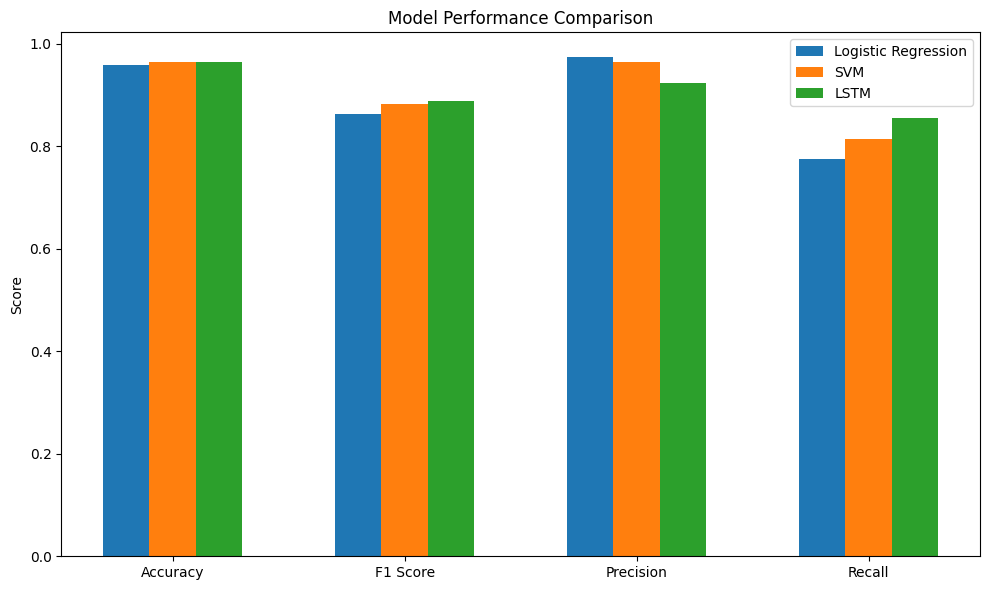

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test, y_pred, y_pred_svm, and pred are available from previous cells

metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
lr_scores = [
    accuracy_score(y_test, y_pred),
    f1_score(y_test, y_pred),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred)
]
svm_scores = [
    accuracy_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_svm)
]
lstm_scores = [
    accuracy_score(y_test, pred),
    f1_score(y_test, pred),
    precision_score(y_test, pred),
    recall_score(y_test, pred)
]

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, lr_scores, width, label='Logistic Regression')
rects2 = ax.bar(x, svm_scores, width, label='SVM')
rects3 = ax.bar(x + width, lstm_scores, width, label='LSTM')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()

# Save the plot as an image file
plt.savefig('model_performance_comparison.png')

plt.show()